## Description
Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. 
Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. 
Ici, les données anormales sont plus éloignées des données normales mais et se ressemblent beaucoup.

Changer les données: 9 cm et 10 cm et 15 anomalies uniformes sur un rayon de 5 cm

Données normales :
- Données aléatoire uniforme
- X1 entre -9 et 9, X2 entre -10 et 10, size = 1500, distance euclidienne entre 5 et 7 (Grand cercle de rayon 10 et petit cercle de rayon 9)

Données anormales :
- Données aléatoire uniforme
- mu = 0, sigma = 0.5, size = 15

Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus éloignées des données normales mais et se ressemblent beaucoup. \n Données normales : Données aléatoire uniforme, X1 entre -5 et 5, X2 entre -7 et 7, size = 1500, distance euclidienne entre 5 et 7 (Grand cercle de rayon 7 et petit cercle de rayon 5) \n Données anormales : Données aléatoire gaussienne, mu = 0, sigma = 0.5, size = 15.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Paramètres de jeu de données

In [18]:
param_y_normal_data = 1
param_y_abnormal_data = 0

size = 1500 #number of samples
small_cercle = 9 #Rayon
big_cercle = 10 #Rayon
x_min_values_interval = -15
x_max_values_interval = 15
y_min_values_interval = -12
y_max_values_interval = 12
x_n_center = 0
y_n_center = 0


contamination = 1/100 # 1%
size_a = int(size*contamination) #size of samples
a_max_cercle = 5 #Rayon
a_min_cercle = 4 #Rayon
x_a_max_values_interval = 25
x_a_min_values_interval = 35
y_a_max_values_interval = -12
y_a_min_values_interval = 12
x_a_center = 30
y_a_center = 0

file_name = "synthetic_2D_data_V5.1.0"+str(datetime.now())
#full_file_path = str(datetime.now().date())+"/"+file_name+".csv"
full_file_path = file_name+".csv"

x_lim = 40
y_lim = 30

## Normal dataset generation

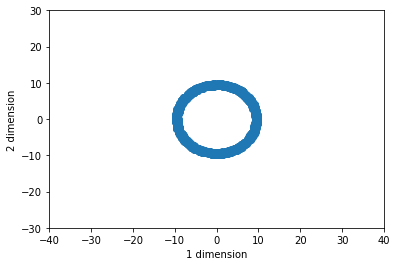

In [19]:
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html
mu = 0 #mean
sigma = 1 #Standard deviation
#n_dataset = np.random.normal(mu, sigma, size)
#n_dataset = np.random(mu, sigma, size)
y_n_dataset  = []
x1_n_dataset = []
x2_n_dataset = []
i = 0
while i<size:
    found = False
    while not found:
        x1 = (x_max_values_interval-x_min_values_interval) * np.random.random_sample() + x_min_values_interval
        x2 = (y_max_values_interval-y_min_values_interval) * np.random.random_sample() + y_min_values_interval
        distance = np.sqrt((x1 - x_n_center)**2 + (x2 - y_n_center)**2)
        if small_cercle < distance < big_cercle:
            found = True
    x1_n_dataset.append(x1)
    x2_n_dataset.append(x2)
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_data_array = {'0': x1_n_dataset, '1':x2_n_dataset, 'is_normal': y_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', 'is_normal'])
#n_dataset
plt.scatter(n_dataset['0'], n_dataset['1'])
plt.xlim(-x_lim,x_lim)
plt.ylim(-y_lim,y_lim)
plt.xlabel('1 dimension')
plt.ylabel('2 dimension')
plt.show()

In [20]:
n_dataset

,0,1,is_normal
0,-9.950855,0.830797,1
1,-9.535036,0.290591,1
2,9.265873,-1.167775,1
3,-9.210124,-3.519762,1
4,6.835395,-6.716381,1
...,...,...,...
1495,3.329708,-8.997049,1
1496,7.925449,-4.826033,1
1497,7.394619,6.397729,1
1498,-8.861994,1.927515,1


## Abnormal gaussian dataset generation

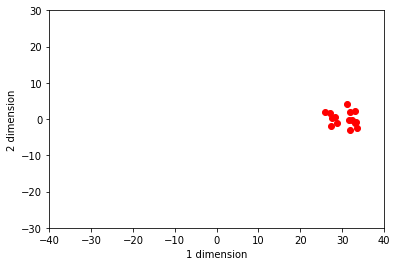

In [21]:
#Abnormal gaussian dataset
y_a_dataset  = []
x1_a_dataset = []
x2_a_dataset = []
i = 0
while i<size_a:
    found = False
    while not found:
        x1 = (x_a_max_values_interval-x_a_min_values_interval) * np.random.random_sample() + x_a_min_values_interval
        x2 = (y_a_max_values_interval-y_a_min_values_interval) * np.random.random_sample() + y_a_min_values_interval
        distance = np.sqrt((x1-x_a_center)**2 + (x2-y_a_center)**2)
        #np.sqrt((x1 - x_n_center)**2 + (x2 - y_n_center)**2)
        if distance < a_max_cercle:
            found = True
    x1_a_dataset.append(x1)
    x2_a_dataset.append(x2)
    y_a_dataset.append(param_y_abnormal_data)
    i = i + 1
a_data_array = {'0': x1_a_dataset, '1':x2_a_dataset, 'is_normal': y_a_dataset}
a_dataset = pd.DataFrame(a_data_array, columns=['0', '1', 'is_normal'])
#a_dataset
plt.scatter(a_dataset['0'], a_dataset['1'], c="r")
plt.xlim(-x_lim,x_lim)
plt.ylim(-y_lim,y_lim)
plt.xlabel('1 dimension')
plt.ylabel('2 dimension')
plt.show()

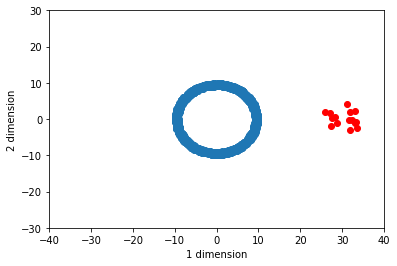

In [22]:
plt.scatter(a_dataset['0'], a_dataset['1'], c="r")
plt.scatter(n_dataset['0'], n_dataset['1'])
plt.xlim(-x_lim,x_lim)
plt.ylim(-y_lim,y_lim)
plt.xlabel('1 dimension')
plt.ylabel('2 dimension')
plt.show()

## Génération du jeu de données complet

In [23]:
dataset = pd.concat([n_dataset, a_dataset], ignore_index=True, sort=False)
dataset

,0,1,is_normal
0,-9.950855,0.830797,1
1,-9.535036,0.290591,1
2,9.265873,-1.167775,1
3,-9.210124,-3.519762,1
4,6.835395,-6.716381,1
...,...,...,...
1510,32.383117,-0.272524,0
1511,27.017941,1.676252,0
1512,28.359810,0.674161,0
1513,25.809712,1.896316,0


In [24]:
dataset.describe()

,0,1,is_normal
count,1515.000000,1515.000000,1515.000000
mean,0.357790,-0.146672,0.990099
std,7.470027,6.553580,0.099043
min,-9.956308,-9.936564,0.000000
25%,-6.874706,-6.402255,1.000000
50%,0.121762,-0.274528,1.000000
75%,7.119019,6.282540,1.000000
max,33.535947,9.970254,1.000000


## Créé le fichier .csv du jeu de données

In [25]:
dataset.to_csv(full_file_path, index=None, header=True)